# Modeling and Simulation in Python

Chapter 1: Modeling

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

## Jupyter

Welcome to Modeling and Simulation, welcome to Python, and welcome to Jupyter.

This is a Jupyter notebook, which is a development environment where you can write and run Python code.  Each notebook is divided into cells.  Each cell contains either text (like this cell) or Python code (like the cell below this one).

### Selecting and running cells

To select a cell, click in the left margin next to the cell.  You should see a blue frame surrounding the selected cell.

To edit a code cell, click inside the cell.  You should see a green frame around the selected cell, and you should see a cursor inside the cell.

To edit a text cell, double-click inside the cell.  Again, you should see a green frame around the selected cell, and you should see a cursor inside the cell.

To run a cell, hold down SHIFT and press ENTER.  If you run a text cell, it will typeset the text and display the result.

If you run a code cell, it runs the Python code in the cell and displays the result, if any.

To try it out, edit this cell, change some of the text, and then press SHIFT-ENTER to run it.

### Adding and removing cells

You can add and remove cells from a notebook using the buttons in the toolbar and the items in the menu, both of which you should see at the top of this notebook.

You might want to try the following exercises:

1.  From the Insert menu select "Insert cell below" to add a cell below this one.  By default, you get a code cell, and you can see in the pulldown menu that says "Code".

2.  In the new cell, add a print statement like `print('Hello')`, and run it.

3.  Add another cell, select the new cell, and then click on the pulldown menu that says "Code" and select "Markdown".  This makes the new cell a text cell.

4.  In the new cell, type some text, and then run it.

5.  Use the arrow buttons in the toolbar to move cells up and down.

6.  Use the cut, copy, and paste buttons to delete, add, and move cells.

7.  As you make changes, Jupyter saves your notebook automatically, but if you want to make sure, you can press the save button, which looks like a floppy disk from the 1990s.

8.  Finally, when you are done with a notebook, selection "Close and Halt" from the File menu.

In [1]:
print('Hello')

Hello


Hi there!

### Using the notebooks

The notebooks for each chapter contain the code from the chapter, along with some addition examples, some explanatory text, and some exercises.  I recommend you read the chapter first to understand the concepts and vocabulary, then run the notebook to review what you learned and see it in action, and then attempt the exercises.

The notebooks contain some explanatory text, but it is probably not enough to make sense if you have not read the book.  If you are working through a notebook and you get stuck, you might want to re-read (or read!) the corresponding section of the book.

If you try to work through the notebooks without reading the book, you're gonna have a bad time.  If you have previous programming experience, you might get through the first few notebooks, but sooner or later, you will get to the end of your leash, and you won't like it.

### Importing modsim

The following cell imports `modsim`, which is a collection of functions we will use throughout the book.  Whenever you start the notebook, you will have to run the following cell.  It does two things:

1.  It uses a Jupyter "magic command" to specify whether figures should appear in the notebook, or pop up in a new window.

2.  It imports everything defined in `modsim`.

Select the following cell and press SHIFT-ENTER to run it.

In [2]:
# If you want the figures to appear in the notebook, use
# %matplotlib notebook

# If you want the figures to appear in separate windows, use
# %matplotlib qt

# To switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


## The penny myth

The following cells contain code from the beginning of Chapter 1.

`modsim` defined `UNITS`, which contains variables representing pretty much every unit you've ever heard of.  The following to lines create new variables named `meter` and `second`.

In [3]:
meter = UNITS.meter
second = UNITS.second

To find out what units are defined, type `UNITS.` in the next cell and then press TAB.  You should see a pop-up menu with a list of units.

Create a variable named `a` and display its value:

In [4]:
a = 9.8 * meter / second**2
a

<Quantity(9.8, 'meter / second ** 2')>

Create `t` and display its value:

In [5]:
t = 4 * second
t

<Quantity(4, 'second')>

If you create a variable and don't display the value, you don't get any output:

In [6]:
h = a * t**2

Add a second line to the previous cell to display the value of `h`.

Now let's solve the falling penny problem.  The following lines set `h` to the height of the Empire State Building and compute the time it would take a penny to fall, assuming constant acceleration.

In [7]:
h = 381 * meter
t = sqrt(2 * h / a)
t

<Quantity(8.817885349720552, 'second')>

Given `t`, we can compute the velocity of the penny when it lands.

In [8]:
v = a * t
v

<Quantity(86.41527642726142, 'meter / second')>

We can convert from one set of units to another like this:

In [9]:
mile = UNITS.mile
hour= UNITS.hour

In [10]:
v.to(mile/hour)

<Quantity(193.30546802805438, 'mile / hour')>

**Exercise:** In reality, air resistance prevents the penny from reaching this velocity.  At about 20 meters per second, the force of air resistance equals the force of gravity and the penny stops accelerating.

As a simplification, let's assume that the acceleration of the penny is `a` until the penny reaches 20 meters per second, and then 0 afterwards.  What is the total time for the penny to fall 381 meters?

In [11]:
# Solution

v_terminal = 20 * meter / second 

t1 = v_terminal / a
print('Time to reach terminal velocity', t1)

h1 = a * t1**2 / 2
print('Height fallen in t1', h1)

t2 = (h - h1) / v_terminal
print('Time to fall remaining distance', t2)

t_total = t1 + t2
print('Total falling time', t_total)

Time to reach terminal velocity 2.0408163265306123 second
Height fallen in t1 20.408163265306126 meter
Time to fall remaining distance 18.029591836734692 second
Total falling time 20.070408163265306 second


## Modeling a bikeshare system

We'll start with a state object that represents the number of bikes at each station.

In [12]:
bikeshare = State(olin=10, wellesley=2)

If you display the value of a state object, it lists the state variables and their values (not necessarily in the order you defined them):

In [13]:
bikeshare

wellesley -> 2
olin -> 10

We can access the state variables using dot notation.

In [14]:
bikeshare.olin

10

In [15]:
bikeshare.wellesley

2

**Exercise:** What happens if you spell the name of a state variable wrong?  Edit the previous cell, change the spelling of `wellesley`, and run the cell again.

The error message uses the word "attribute", which is another name for what we are calling a "state variable". 

**Exercise:** Add a third attribute called `babson` with initial value 0, and print the state of `bikeshare` again.

## Plotting

`newfig` creates a new figure, which should appear either in the notebook or in a new window, depending on which magic command you ran in the first code cell.

`plot` adds a data point to the figure; in this example, you should see a red square and a blue circle representing the number of bikes at each station.

<IPython.core.display.Javascript object>


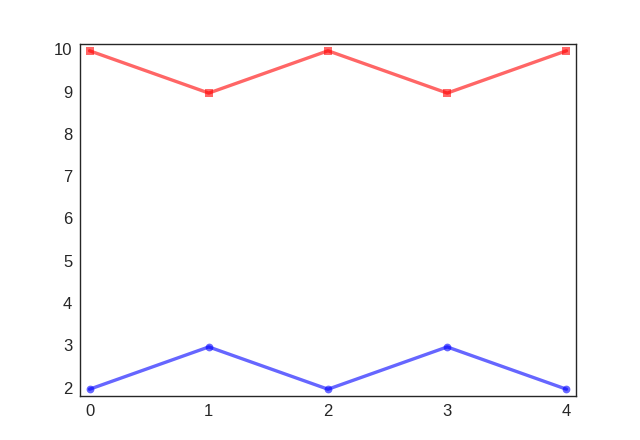

In [16]:
newfig()
plot(bikeshare.olin, 'rs-')
plot(bikeshare.wellesley, 'bo-')

We can use the operators `+=` and `-=` to increase and decrease the state variables.  The following lines move a bike from Olin to Wellesley.

In [17]:
bikeshare.olin -= 1
bikeshare.wellesley += 1
bikeshare

wellesley -> 3
olin -> 9

And the following lines plot the updated state.  You should see two new data points with lines connecting them to the old data points.

In [18]:
plot(bikeshare.olin, 'rs-')
plot(bikeshare.wellesley, 'bo-')

**Exercise:** In the cell below, write a few lines of code to move a bike from Wellesley to Olin and plot the updated state.

In [19]:
# Solution

bikeshare.olin += 1
bikeshare.wellesley -= 1
plot(bikeshare.olin, 'rs-')
plot(bikeshare.wellesley, 'bo-')
bikeshare

wellesley -> 2
olin -> 10

## Functions

Now we can take the code we've written so far and encapsulate it in functions.

In [20]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

When you define a function, it doesn't run the statements inside the function, yet.

In [21]:
def plot_state():
    plot(bikeshare.olin, 'rs-', label='Olin')
    plot(bikeshare.wellesley, 'bo-', label='Wellesley')

Now when we run the functions, it runs the statements inside.

In [22]:
bike_to_wellesley()
plot_state()
bikeshare

wellesley -> 3
olin -> 9

You should see two more data points that represent the current state.  If the figure is embedded in the notebook, you might have to scroll up to see the change.

One common error is to omit the parentheses, which has the effect of looking up the function, but not running it.

In [23]:
bike_to_wellesley

<function __main__.bike_to_wellesley>

The output indicates that `bike_to_wellesley` is a function defined in a "namespace" called `__main__`, but you don't have to understand what that means.

**Exercise:** Define a function called `bike_to_olin` that moves a bike from Wellesley to Olin.  Run the new function and print or plot the results to confirm that it works.

In [24]:
# Solution

def bike_to_olin():
    bikeshare.wellesley -= 1
    bikeshare.olin += 1
    
bike_to_olin()
plot_state()
bikeshare

wellesley -> 2
olin -> 10

## Parameters

Before we go on, let's start with a new state object and a new plot.

<IPython.core.display.Javascript object>


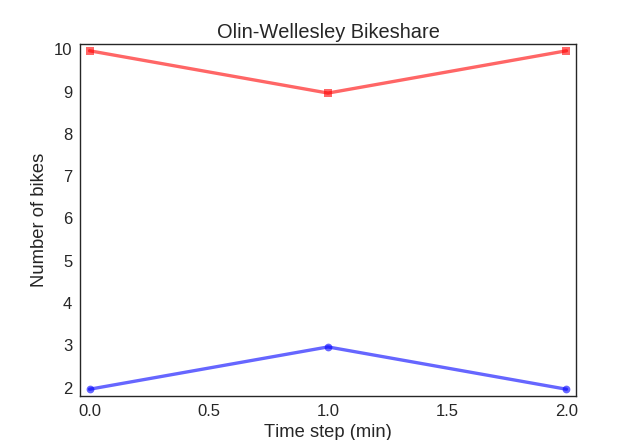

In [25]:
bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()

Since we have two similar functions, we can create a new function, `move_bike` that takes a parameter `n`, which indicates how many bikes are moving, and in which direction.

In [26]:
def move_bike(n):
    bikeshare.olin -= n
    bikeshare.wellesley += n

Now we can use `move_bike` to write simpler versions of the other functions.

In [27]:
def bike_to_wellesley():
    move_bike(1)
    
def bike_to_olin():
    move_bike(-1)

When we define these functions, we replace the old definitions with the new ones.

Now we can test them and update the figure.

In [28]:
bike_to_wellesley()
plot_state()
bikeshare

olin -> 9
wellesley -> 3

Again, each time you run `plot_state` you should see changes in the figure.

In [29]:
bike_to_olin()
plot_state()
bikeshare

olin -> 10
wellesley -> 2

At this point, `move_bike` is complicated enough that we should add some documentation.  The text in triple-quotation marks is in English, not Python.  It doesn't do anything when the program runs, but it helps people understand what this function does and how to use it.

In [30]:
def move_bike(n):
    """Move bikes.
    
    n: number of bikes: positive moves from Olin to Wellesley;
                        negative moves from Wellesley to Olin
    """
    bikeshare.olin -= n
    bikeshare.wellesley += n

Whenever you make a figure, you should put labels on the axes to explain what they mean and what units they are measured in.  Here's how:

In [31]:
label_axes(title='Olin-Wellesley Bikeshare',
           xlabel='Time step (min)', 
           ylabel='Number of bikes')

Again, you might have to scroll up to see the effect.

And you can save figures as files; the suffix of the filename indicates the format you want.  This example saves the current figure in a PDF file.

In [32]:
savefig('chap01_fig01.pdf')

Saving figure to file chap01_fig01.pdf


**Exercise:** The following function definitions start with print statements so they display messages when they run.  Run each of these functions (with appropriate arguments) and confirm that they do what you expect.

Adding print statements like this to functions is a useful debugging technique.  Keep it in mind!

In [33]:
def move_bike_debug(n):
    print('Running move_bike_debug with argument', n)
    bikeshare.olin -= n
    bikeshare.wellesley += n
    
def bike_to_wellesley_debug():
    print('Running bike_to_wellesley_debug')
    move_bike_debug(1)
    
def bike_to_olin_debug():
    print('Running bike_to_olin_debug')
    move_bike_debug(-1)

In [34]:
# Solution

move_bike_debug(1)
bikeshare

Running move_bike_debug with argument 1


olin -> 9
wellesley -> 3

In [35]:
# Solution

bike_to_wellesley_debug()
bikeshare

Running bike_to_wellesley_debug
Running move_bike_debug with argument 1


olin -> 8
wellesley -> 4

In [36]:
# Solution

bike_to_olin_debug()
bikeshare

Running bike_to_olin_debug
Running move_bike_debug with argument -1


olin -> 9
wellesley -> 3

## Conditionals

The function `flip` takes a probability and returns either `True` or `False`, which are special values defined by Python.

In the following example, the probability is 0.7 or 70%.  If you run this cell several times, you should get `True` about 70% of the time and `False` about 30%.

In [37]:
flip(0.7)

True

Modify the argument in the previous cell and see what effect it has.

In the following example, we use `flip` as part of an if statement.  If the result from `flip` is `True`, we print `heads`; otherwise we do nothing.

In [38]:
if flip(0.7):
    print('heads')

heads


With an else clause, we can print heads or tails depending on whether `flip` returns `True` or `False`.

In [39]:
if flip(0.7):
    print('heads')
else:
    print('tails')

heads


Now let's get back to the bikeshare system.  Again let's start with a new state object and a new plot.

<IPython.core.display.Javascript object>


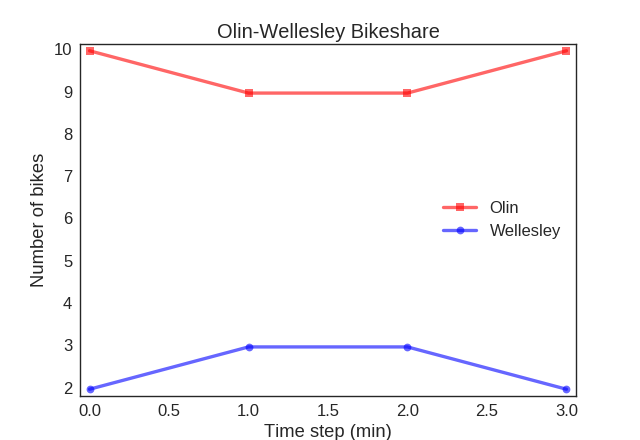

In [40]:
bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()

Suppose that in any given minute, there is a 70% chance that a student picks up a bike at Olin and rides to Wellesley.  We can simulate that like this.

In [41]:
if flip(0.7):
    bike_to_wellesley()
    print('Moving a bike to Wellesley')

plot_state()
bikeshare

Moving a bike to Wellesley


olin -> 9
wellesley -> 3

And maybe at the same time, there is also a 60% chance that a student at Wellesley rides to Olin.

In [42]:
if flip(0.6):
    bike_to_olin()
    print('Moving a bike to Olin')

plot_state()
bikeshare

olin -> 9
wellesley -> 3

We can wrap that code in a function called `step` that simulates one time step.  In any given minute, a student might ride from Olin to Wellesley, from Wellesley to Olin, or both, or neither, depending on the results of `flip`.

In [43]:
def step():
    if flip(0.7):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(0.6):
        bike_to_olin()
        print('Moving a bike to Olin')

If you run `step` a few times, it should update the current figure.  In each time step, the number of bikes at each location might go up, down, or stay the same.

In [44]:
step()
plot_state()
bikeshare

Moving a bike to Olin


olin -> 10
wellesley -> 2

The following function labels the axes and adds a legend to the figure.

In [45]:
def annotate():
    legend(loc='best')
    label_axes(title='Olin-Wellesley Bikeshare',
               xlabel='Time step (min)', 
               ylabel='Number of bikes')

As always, when you define a function, it has no effect until you run it.

In [46]:
annotate()

**Exercise:**  Change the argument of `legend` to `'random string'` and run `annotate` again.  You should get an error message that lists the valid location where you can put the legend.

## Optional parameters

Again let's start with a new state object and a new plot.

<IPython.core.display.Javascript object>


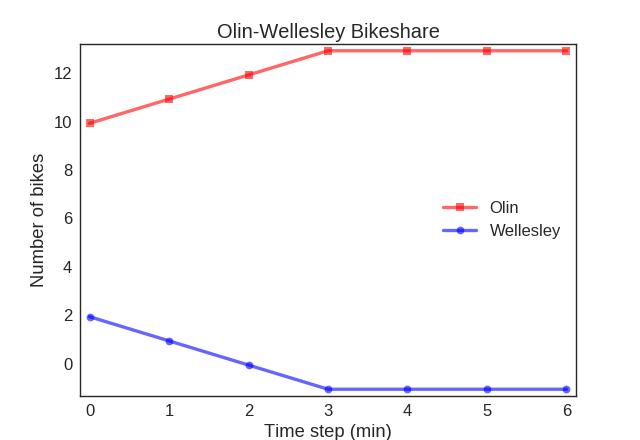

In [47]:
bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()

We can make `step` more general by adding parameters.  Because these parameters have default values, they are optional.

In [48]:
def step(p1=0.5, p2=0.5):
    print('p1 ->', p1)
    print('p2 ->', p2)
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

I added print statements, so each time we run `step` we can see the arguments.

If you provide no arguments, you get the default values:

In [49]:
step()
plot_state()

p1 -> 0.5
p2 -> 0.5


If you provide one argument, it overrides the first parameter.

In [50]:
step(0.4)
plot_state()

p1 -> 0.4
p2 -> 0.5


If you provide two arguments, they override both.

In [51]:
step(0.4, 0.2)
plot_state()

p1 -> 0.4
p2 -> 0.2


You can specify the names of the parameters you want to override.

In [52]:
step(p1=0.4, p2=0.2)
plot_state()

p1 -> 0.4
p2 -> 0.2


Which means you can override the second parameter and use the default for the first.

In [53]:
step(p2=0.2)
plot_state()

p1 -> 0.5
p2 -> 0.2


You can combine both forms, but it is not very common:

In [54]:
step(0.4, p2=0.2)
plot_state()

p1 -> 0.4
p2 -> 0.2


One reason it's not common is that it's error prone.  The following example causes an error.

In [55]:
# If you remove the # at the beginning of the next line and run it, you get
# SyntaxError: positional argument follows keyword argument

#step(p1=0.4, 0.2)

From the error message, you might infer that arguments like `step(0.4, 0.2)` are called "positional" and arguments like `step(p1=0.4, p2=0.2)` are called "keyword arguments".

**Exercise:** Write a version of `annotate` that takes an optional parameter named `loc` with default value `'best'`.  It should pass the value of `loc` along as an argument to `legend.`  Test your function with different values of `loc`.  [You can see the list of legal values here](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend).

In [56]:
# Solution

def annotate(loc='best'):
    legend(loc=loc)
    label_axes(title='Olin-Wellesley Bikeshare',
               xlabel='Time step (min)', 
               ylabel='Number of bikes')

In [57]:
annotate('center right')

## For loop

Before we go on, I'll redefine `step` without the print statements.

In [58]:
def step(p1=0.5, p2=0.5):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

And let's start again with a new state object and a new figure.

<IPython.core.display.Javascript object>


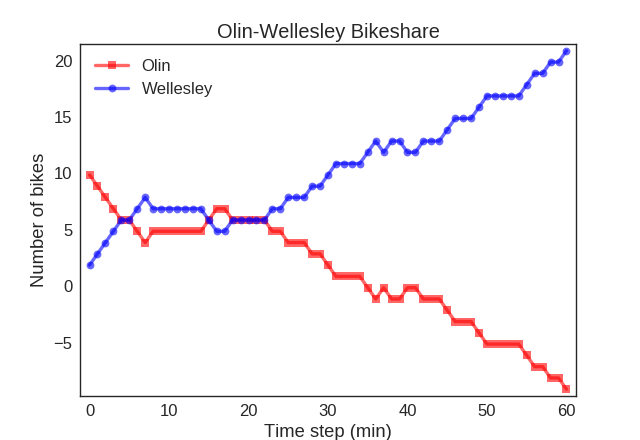

In [59]:
bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()
annotate()

We can use a for loop to move 4 bikes from Olin to Wellesley.

In [60]:
for i in range(4):
    bike_to_wellesley()
    plot_state()

Or we can simulate 4 random time steps.

In [61]:
for i in range(4):
    step()
    plot_state()

If each step corresponds to a minute, we can simulate the rest of the hour like this.

In [62]:
for i in range(52):
    step(p1=0.4, p2=0.2)
    plot_state()

**Exercise:** Combine the examples from the previous two sections to write a function named `run_steps` that takes three parameters, named `num_steps`, `p1`, and `p2`.  It should use a for loop to run `step` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.  After each step, it should plot the updated state.

Test your function by creating a new `State` object, creating a new figure, and running `run_steps`.

In [63]:
# Solution

def run_steps(num_steps=1, p1=0.5, p2=0.5):
    for i in range(num_steps):
        step(p1, p2)
        plot_state()

<IPython.core.display.Javascript object>


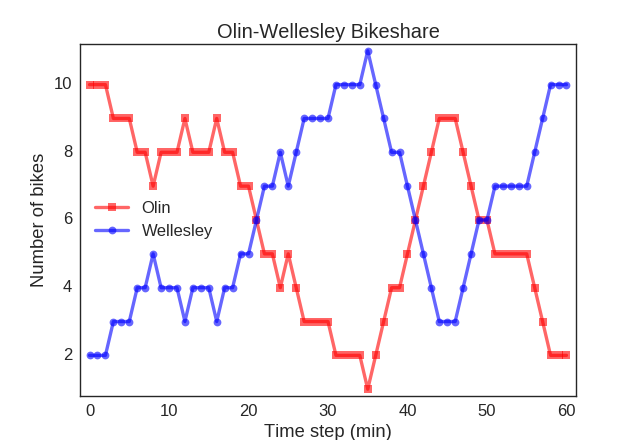

In [64]:
# Solution

bikeshare = State(olin=10, wellesley=2)
newfig()
plot_state()
annotate()
run_steps(60, 0.4, 0.2)